In [5]:
#!conda install statsmodels --yes
import statsmodels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Mapa
import folium

# Procesamiento de datos
from sklearn.preprocessing import MinMaxScaler

# Modelo
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Separar train y test
from sklearn.model_selection import train_test_split

# Métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import plotly.express as px

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
df.shape

(20640, 10)

### Vemos las estadísticas del dataset

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Visualizamos la relación entre columnas con la variable objetivo "median_income"

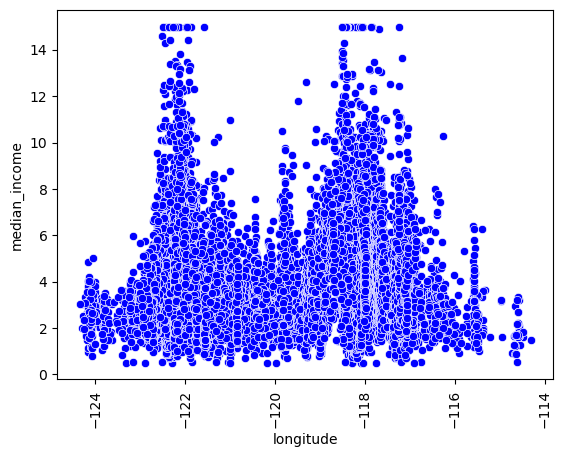

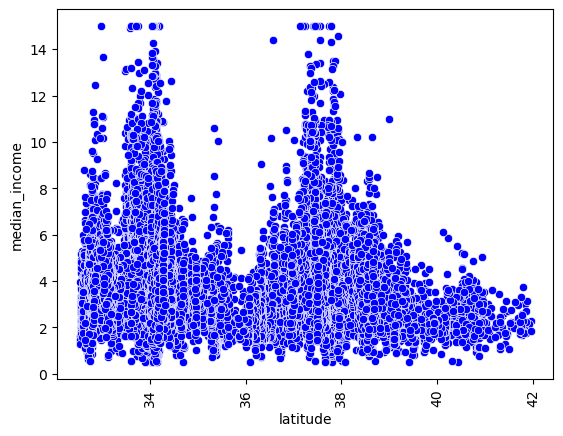

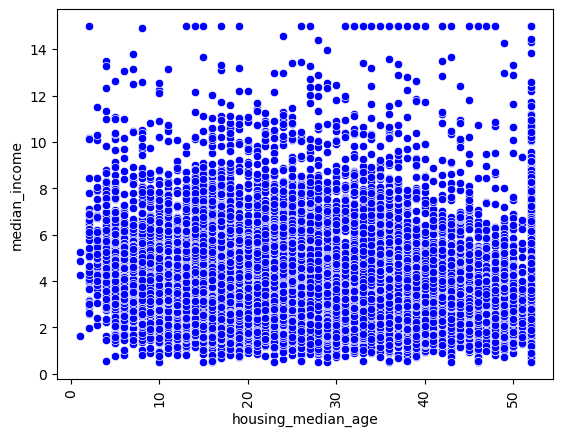

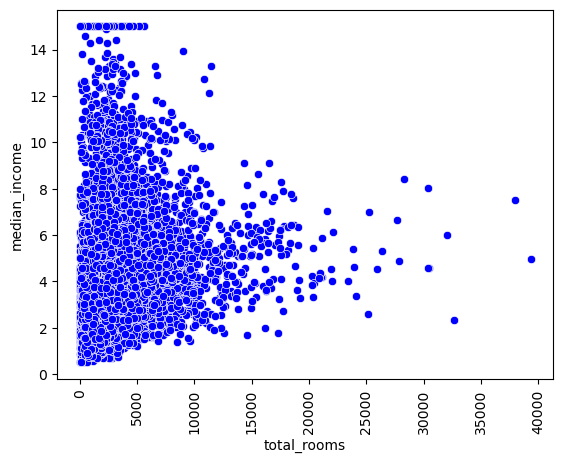

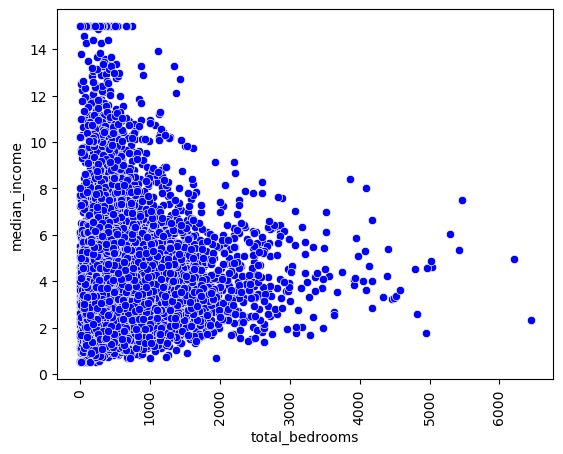

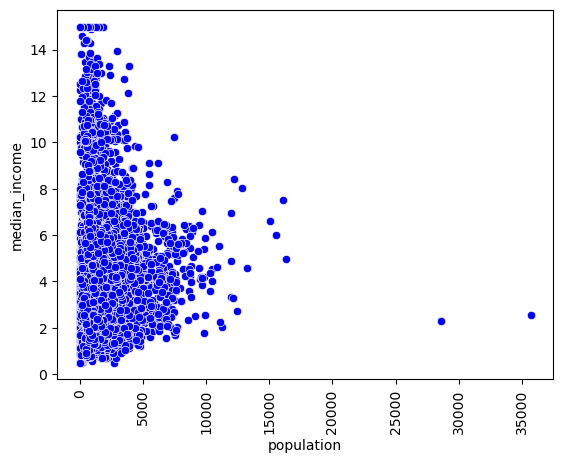

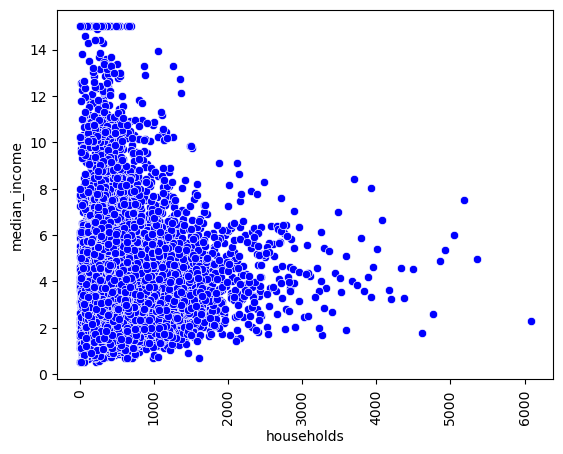

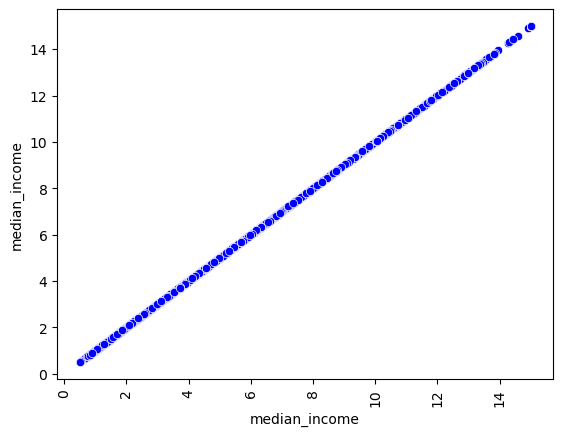

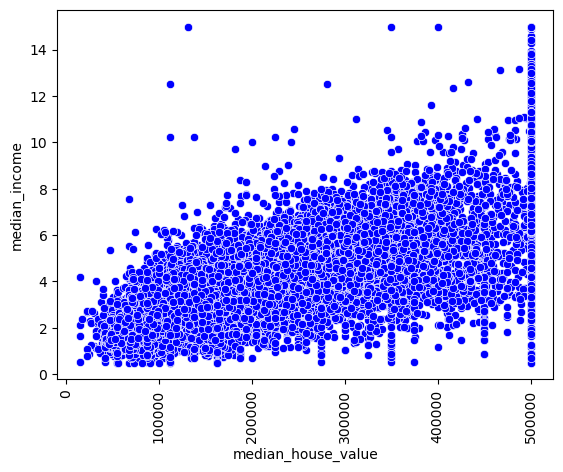

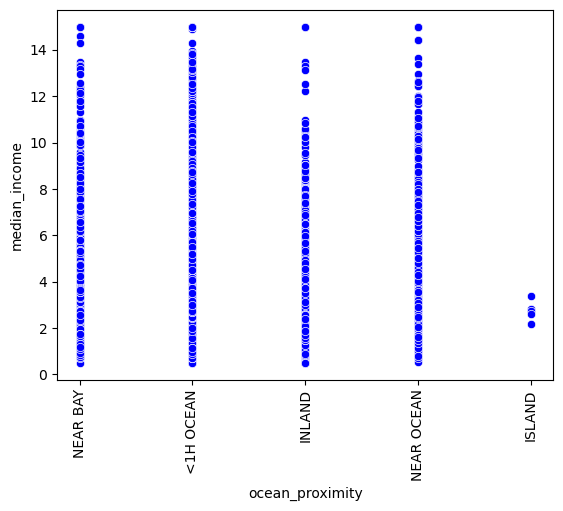

In [9]:
for col in df.columns:
    sns.scatterplot(x = df[col], y = df["median_income"], color = "b")
    plt.xticks(rotation = 90)
    plt.show()

### Analizamos los nulos

In [10]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
total_rows = len(df)
missing_rows = df['total_bedrooms'].isna().sum()

percentage_missing = (missing_rows / total_rows) * 100
print(f'Percentage of Missing Values: {percentage_missing:.2f}%')

Percentage of Missing Values: 1.00%


In [12]:
rows_with_na = df[df['total_bedrooms'].isna()]
print(rows_with_na)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  media

In [13]:
unique_class_name = rows_with_na['ocean_proximity'].unique()
unique_class_name

array(['NEAR BAY', 'INLAND', 'NEAR OCEAN', '<1H OCEAN'], dtype=object)

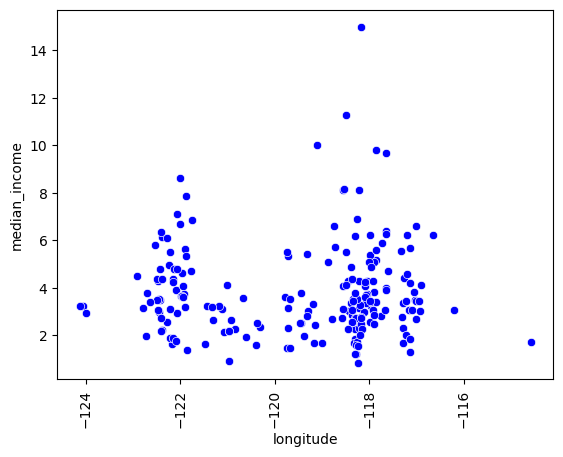

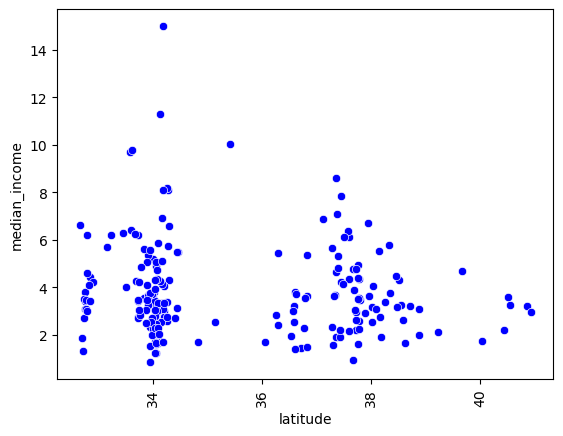

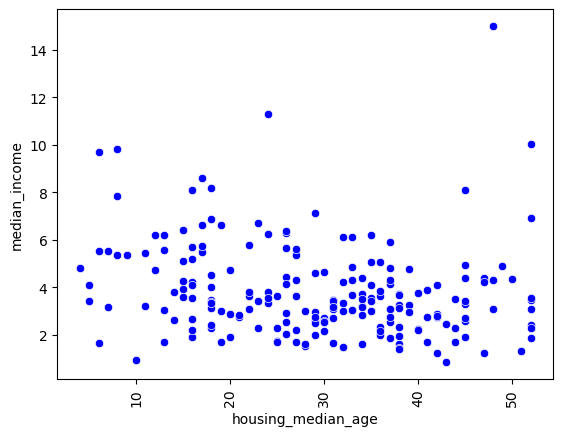

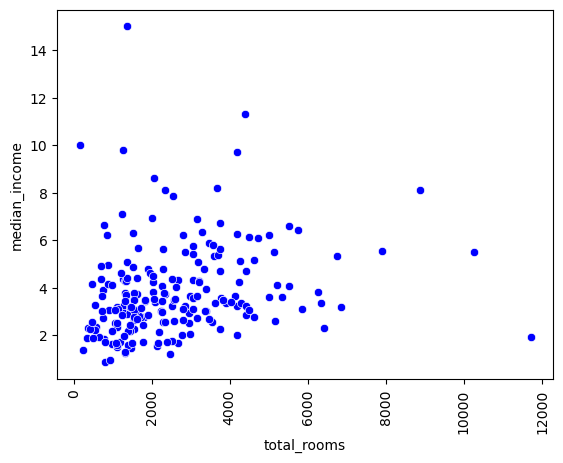

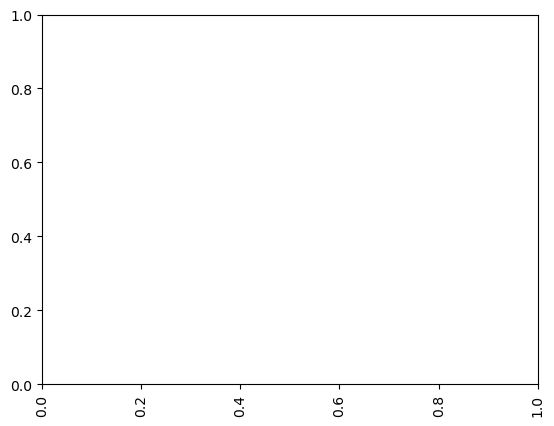

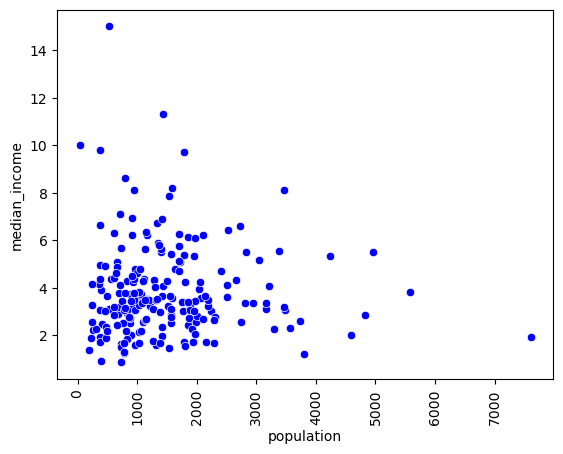

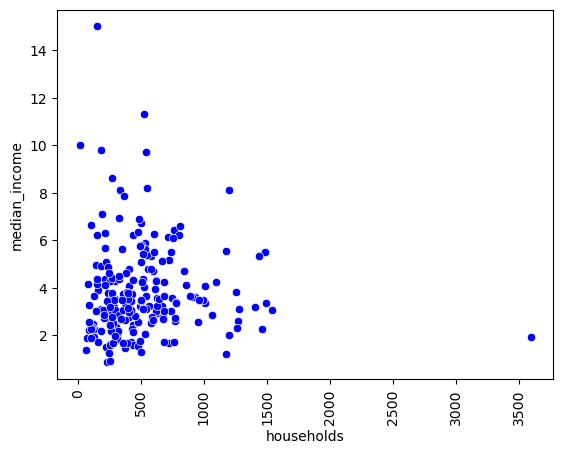

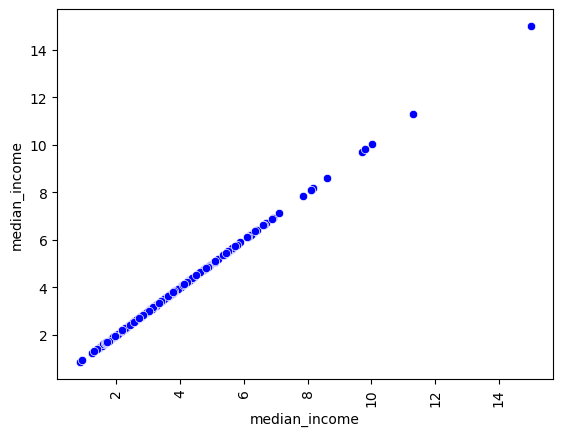

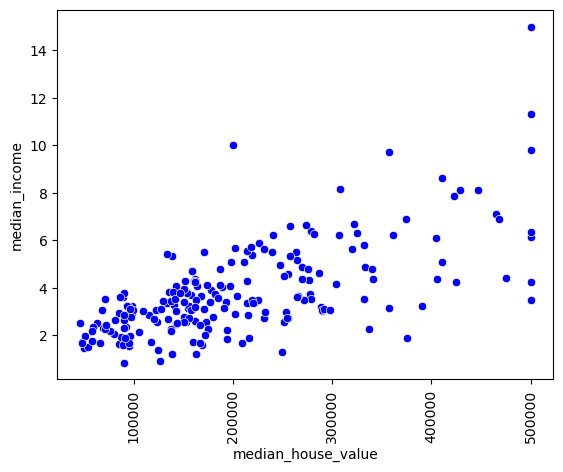

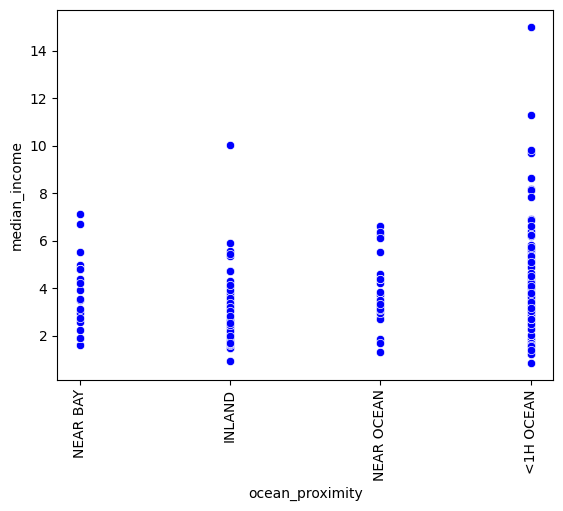

In [14]:
for col in df.columns:
    sns.scatterplot(x = rows_with_na[col], y = rows_with_na["median_income"], color = "b")
    plt.xticks(rotation = 90)
    plt.show()

El subconjunto de nulos se comporta muy similar al total de la población del dataset, asimismo sólo representa un 1% del total por lo que eliminarlo es la mejor solución.

### Borramos los nulos en lugar de trabajarlos porque son muy pocos en comparación con la cantidad de datos que tenemos.


In [15]:
df.dropna(inplace=True)

### Verificación del dataset una vez eliminadas las filas vacías.

In [16]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [17]:
df.shape

(20433, 10)

### Vemos el tipo de dato de las columnas

In [18]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Evaluamos si los números luego de la coma son ceros antes de cambiar los tipos de datos.

In [19]:
for column in df.columns:
    if df[column].dtype == float:
        all_integers = (df[column] % 1 == 0).all()
        
        print(f"All numbers are integers in column '{column}':", all_integers)
        
        if all_integers:
            df[column] = df[column].astype(int)
            print(f"Column '{column}' converted to integers.")
        else:
            print(f"There are some numbers that are not pure integers in column '{column}'.")
    else:
        print(f"No check needed for column '{column}' as it is not float.")

All numbers are integers in column 'longitude': False
There are some numbers that are not pure integers in column 'longitude'.
All numbers are integers in column 'latitude': False
There are some numbers that are not pure integers in column 'latitude'.
All numbers are integers in column 'housing_median_age': True
Column 'housing_median_age' converted to integers.
All numbers are integers in column 'total_rooms': True
Column 'total_rooms' converted to integers.
All numbers are integers in column 'total_bedrooms': True
Column 'total_bedrooms' converted to integers.
All numbers are integers in column 'population': True
Column 'population' converted to integers.
All numbers are integers in column 'households': True
Column 'households' converted to integers.
All numbers are integers in column 'median_income': False
There are some numbers that are not pure integers in column 'median_income'.
All numbers are integers in column 'median_house_value': True
Column 'median_house_value' converted to

### Cambiamos el tipo de dato de las columnas numéricas a int

In [20]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms          int64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [21]:
df["median_income"] = df["median_income"]*10000

# Análisis de las casas por encima de los 500k y relación con el media income arriba de 100k

### mirar si hay datos de 0 o menos de 100 dólares al mes

In [22]:
high_value_houses = df[df['median_house_value'] > 500000]

high_value_houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52,249,78,396,85,12434.0,500001,NEAR BAY
459,-122.25,37.87,52,609,236,1349,250,11696.0,500001,NEAR BAY
493,-122.24,37.86,52,1668,225,517,214,78521.0,500001,NEAR BAY
494,-122.24,37.85,52,3726,474,1366,496,93959.0,500001,NEAR BAY
509,-122.23,37.83,52,2990,379,947,361,78772.0,500001,NEAR BAY


In [23]:
# Crear el gráfico histograma con Plotly Express
fig = px.histogram(high_value_houses, x='median_income', title='Variable independiente vs variable dependiente')

# Mostrar el gráfico
fig.show()

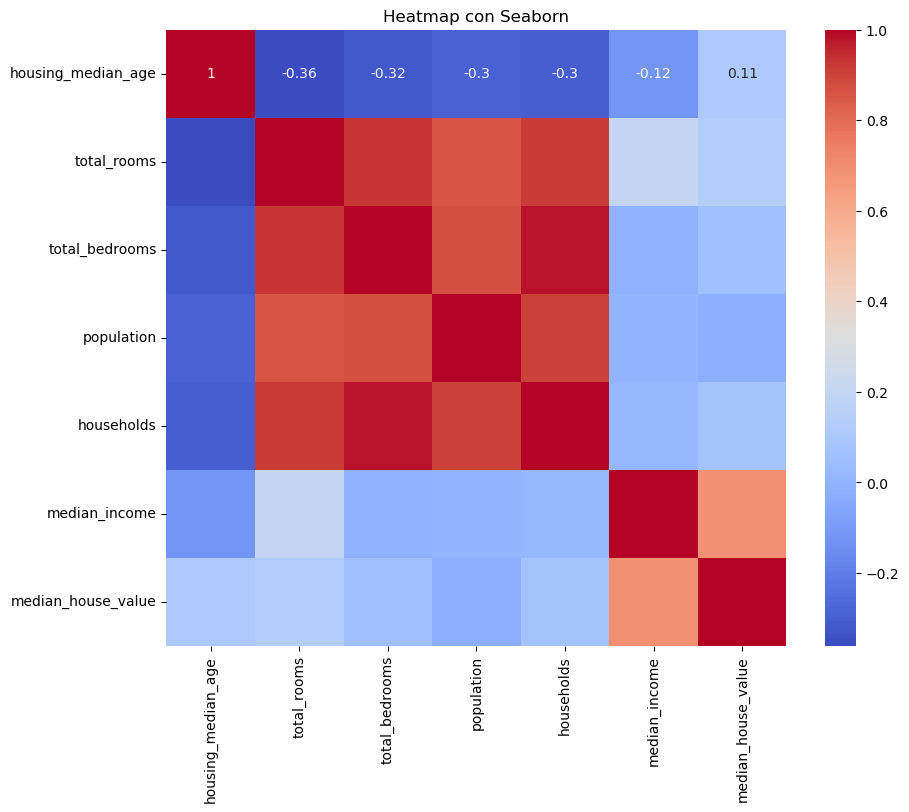

In [24]:
# Crear un heatmap con Seaborn
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
sns.heatmap(df.drop(columns = ['latitude', 'longitude', 'ocean_proximity']).corr(), annot=True, cmap='coolwarm')  # Crear el heatmap con la matriz de correlación de df
plt.title('Heatmap con Seaborn')  # Título del gráfico
plt.show()

In [25]:

# Supongamos que df es tu DataFrame
# Cálculo de Q1, Q3 y el rango intercuartílico (IQR)
Q1 = df['median_income'].quantile(0.25)
Q3 = df['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Identificación de outliers
filtro_outliers_income = (df['median_income'] < (Q1 - 1.5 * IQR)) | (df['median_income'] > (Q3 + 1.5 * IQR))

# Similar para 'medianHouseValue'
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
filtro_outliers_house_value = (df['median_house_value'] < (Q1 - 1.5 * IQR)) | (df['median_house_value'] > (Q3 + 1.5 * IQR))

# Aplicar filtros si quieres eliminar ambos tipos de outliers
df_clean = df[~(filtro_outliers_income | filtro_outliers_house_value)]


In [26]:
# Crear el gráfico histograma con Plotly Express
fig = px.histogram(df_clean, x='median_income', title='Variable independiente vs variable dependiente')

# Mostrar el gráfico
fig.show()

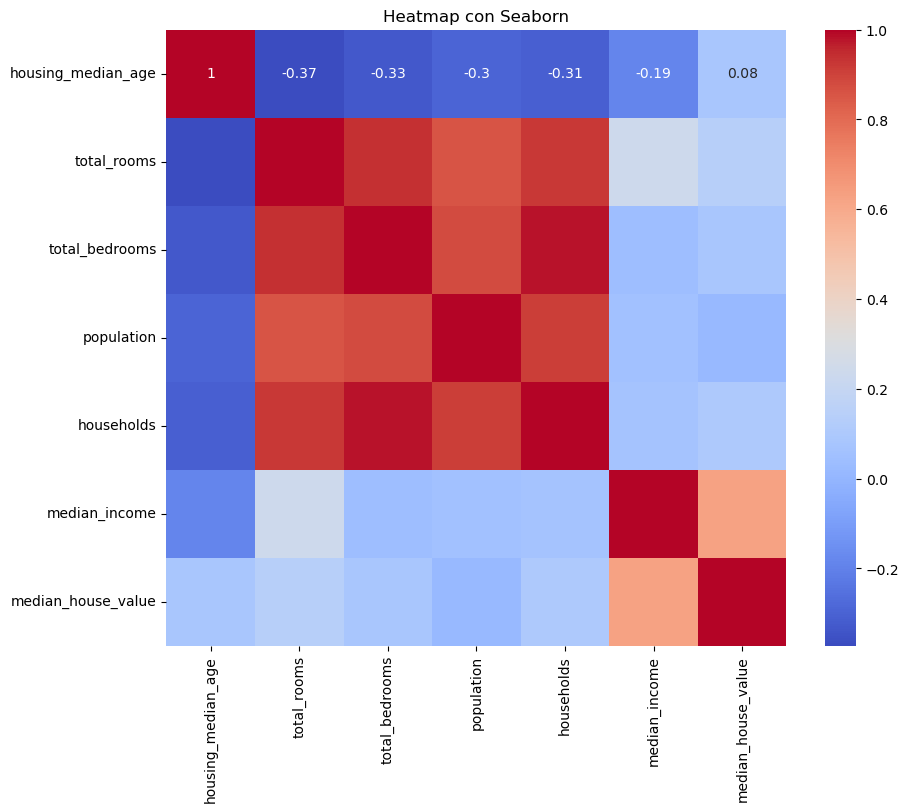

In [27]:
# Crear un heatmap con Seaborn
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
sns.heatmap(df_clean.drop(columns = ['latitude', 'longitude', 'ocean_proximity']).corr(), annot=True, cmap='coolwarm')  # Crear el heatmap con la matriz de correlación de df
plt.title('Heatmap con Seaborn')  # Título del gráfico
plt.show()

In [28]:
# Cálculo de Q1, Q3 y el rango intercuartílico (IQR) para 'medianIncome'
Q1_income = df['median_income'].quantile(0.25)
Q3_income = df['median_income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

# Identificación de outliers para 'medianIncome'
filtro_outliers_income = (df['median_income'] < (Q1_income - 1.5 * IQR_income)) | (df['median_income'] > (Q3_income + 1.5 * IQR_income))

# Cálculo de Q1, Q3 y el IQR para 'medianHouseValue'
Q1_house = df['median_house_value'].quantile(0.25)
Q3_house = df['median_house_value'].quantile(0.75)
IQR_house = Q3_house - Q1_house

# Identificación de outliers para 'medianHouseValue'
filtro_outliers_house_value = (df['median_house_value'] < (Q1_house - 1.5 * IQR_house)) | (df['median_house_value'] > (Q3_house + 1.5 * IQR_house))

# Conteo de outliers
num_outliers_income = df[filtro_outliers_income].shape[0]
num_outliers_house_value = df[filtro_outliers_house_value].shape[0]

# Total de outliers
total_outliers = df[filtro_outliers_income | filtro_outliers_house_value].shape[0]

# Número total de registros
total_records = df.shape[0]

# Cálculo del porcentaje de outliers
percentage_outliers_income = (num_outliers_income / total_records) * 100
percentage_outliers_house_value = (num_outliers_house_value / total_records) * 100
percentage_total_outliers = (total_outliers / total_records) * 100

print(f"Porcentaje de outliers en 'median_income': {percentage_outliers_income:.2f}%")
print(f"Porcentaje de outliers en 'median_house_value': {percentage_outliers_house_value:.2f}%")
print(f"Porcentaje total de outliers en ambas variables: {percentage_total_outliers:.2f}%")


Porcentaje de outliers en 'median_income': 3.28%
Porcentaje de outliers en 'median_house_value': 5.21%
Porcentaje total de outliers en ambas variables: 6.28%


In [29]:
# Aplicando transformación logarítmica
df['log_income'] = np.log(df['median_income'])

# Aplicando transformación de raíz cuadrada
df['sqrt_income'] = np.sqrt(df['median_income'])

In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_income,sqrt_income
0,-122.23,37.88,41,880,129,322,126,83252.0,452600,NEAR BAY,11.329627,288.534227
1,-122.22,37.86,21,7099,1106,2401,1138,83014.0,358500,NEAR BAY,11.326765,288.121502
2,-122.24,37.85,52,1467,190,496,177,72574.0,352100,NEAR BAY,11.192362,269.395620
3,-122.25,37.85,52,1274,235,558,219,56431.0,341300,NEAR BAY,10.940774,237.552100
4,-122.25,37.85,52,1627,280,565,259,38462.0,342200,NEAR BAY,10.557426,196.117312


In [31]:
# Cálculo de Q1, Q3 y el rango intercuartílico (IQR) para 'medianIncome'
Q1_income = df['log_income'].quantile(0.25)
Q3_income = df['log_income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

# Identificación de outliers para 'medianIncome'
filtro_outliers_income = (df['log_income'] < (Q1_income - 1.5 * IQR_income)) | (df['log_income'] > (Q3_income + 1.5 * IQR_income))

# Cálculo de Q1, Q3 y el IQR para 'medianHouseValue'
Q1_house = df['sqrt_income'].quantile(0.25)
Q3_house = df['sqrt_income'].quantile(0.75)
IQR_house = Q3_house - Q1_house

# Identificación de outliers para 'medianHouseValue'
filtro_outliers_house_value = (df['sqrt_income'] < (Q1_house - 1.5 * IQR_house)) | (df['sqrt_income'] > (Q3_house + 1.5 * IQR_house))

# Conteo de outliers
num_outliers_income = df[filtro_outliers_income].shape[0]
num_outliers_house_value = df[filtro_outliers_house_value].shape[0]

# Total de outliers
total_outliers = df[filtro_outliers_income | filtro_outliers_house_value].shape[0]

# Número total de registros
total_records = df.shape[0]

# Cálculo del porcentaje de outliers
percentage_outliers_income = (num_outliers_income / total_records) * 100
percentage_outliers_house_value = (num_outliers_house_value / total_records) * 100
percentage_total_outliers = (total_outliers / total_records) * 100

print(f"Porcentaje de outliers en 'log_income': {percentage_outliers_income:.2f}%")
print(f"Porcentaje de outliers en 'sqrt_income': {percentage_outliers_house_value:.2f}%")
print(f"Porcentaje total de outliers en ambas variables: {percentage_total_outliers:.2f}%")


Porcentaje de outliers en 'log_income': 1.34%
Porcentaje de outliers en 'sqrt_income': 1.92%
Porcentaje total de outliers en ambas variables: 2.59%


In [32]:
# Discretización de la variable
df['viarable_nueva'] = pd.cut(df['median_income'], bins=5, labels=False)

# Normalización logarítmica de la variable
df['log_income_n'] = np.log(df['median_income'] + 1)  # +1 para manejar valores cero en los datos

# Normalización de raíz cuadrada
df['sqrt_income_n'] = np.sqrt(df['median_income'])

In [33]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_income,sqrt_income,viarable_nueva,log_income_n,sqrt_income_n
0,-122.23,37.88,41,880,129,322,126,83252.0,452600,NEAR BAY,11.329627,288.534227,2,11.329639,288.534227
1,-122.22,37.86,21,7099,1106,2401,1138,83014.0,358500,NEAR BAY,11.326765,288.121502,2,11.326777,288.121502
2,-122.24,37.85,52,1467,190,496,177,72574.0,352100,NEAR BAY,11.192362,269.395620,2,11.192376,269.395620
3,-122.25,37.85,52,1274,235,558,219,56431.0,341300,NEAR BAY,10.940774,237.552100,1,10.940792,237.552100
4,-122.25,37.85,52,1627,280,565,259,38462.0,342200,NEAR BAY,10.557426,196.117312,1,10.557452,196.117312


In [34]:
mean_income = df['median_income'].mean()
std_income = df['median_income'].std()

# Ahora, aplicamos la fórmula de estandarización a la columna
df['income_standardized'] = (df['median_income'] - mean_income) / std_income

# 'medianIncome_standardized' ahora tiene una media de 0 y desviación estándar de 1

/opt/anaconda3/envs/california_houses/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/envs/california_houses/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



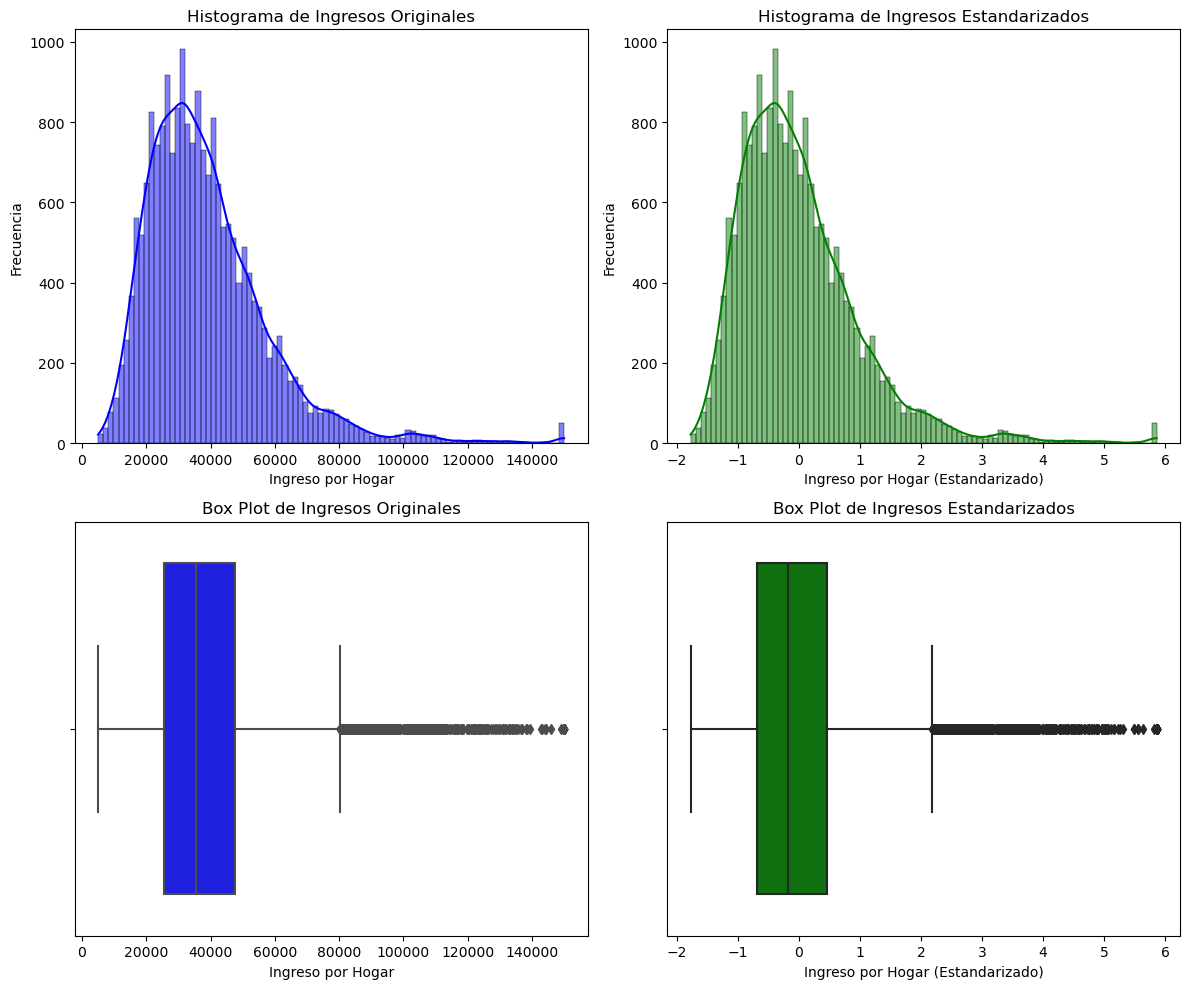

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histograma de los datos originales
sns.histplot(df['median_income'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Histograma de Ingresos Originales')
axes[0, 0].set_xlabel('Ingreso por Hogar')
axes[0, 0].set_ylabel('Frecuencia')

# Histograma de los datos estandarizados
sns.histplot(df['income_standardized'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Histograma de Ingresos Estandarizados')
axes[0, 1].set_xlabel('Ingreso por Hogar (Estandarizado)')
axes[0, 1].set_ylabel('Frecuencia')

# Box plot de los datos originales
sns.boxplot(x=df['median_income'], ax=axes[1, 0], color='blue')
axes[1, 0].set_title('Box Plot de Ingresos Originales')
axes[1, 0].set_xlabel('Ingreso por Hogar')

# Box plot de los datos estandarizados
sns.boxplot(x=df['income_standardized'], ax=axes[1, 1], color='green')
axes[1, 1].set_title('Box Plot de Ingresos Estandarizados')
axes[1, 1].set_xlabel('Ingreso por Hogar (Estandarizado)')

# Mostrar gráficas
plt.tight_layout()
plt.show()

1. la media (promedio) de los datos transformados será aproximadamente cero eliminando el sesgo de la media en los datos de entrada. 

la estandarización no elimina los outliers, hace que sean más fáciles de identificar. Los valores que son significativamente mayores que 3 o menores que -3 pueden considerarse atípicos, dado que la mayoría de los datos en una distribución normal estándar se encuentra entre -3 y 3 desviaciones estándar de la media.

Si los datos originales estaban sesgados, lo seguirán estando después de la estandarización. Aquí es donde podrías considerar otras transformaciones (como logarítmica o raíz cuadrada) si necesitas una distribución más normal para ciertos análisis estadístico

In [36]:
X = df[['median_income']]  # sklearn espera una matriz de características 2D
Y = df['median_house_value']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, Y_train)

# Coeficientes del modelo
print('Coeficiente:', model.coef_)
print('Intercepto:', model.intercept_)

# Usar el modelo para hacer predicciones
predictions = model.predict(X_test)

Coeficiente: [4.17271139]
Intercepto: 45303.154426746216
